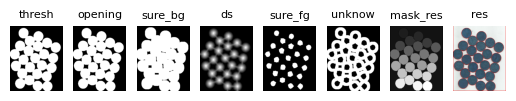

In [30]:
import numpy as np

from utils import show_image
# AUTHOR    ：Lv Wenchao
# coding    : utf-8
# @Time     : 2022/11/21 10:48
# @FileName : 分水岭算法图像分割.py
# @Software : PyCharm
import cv2

"""
任何一副灰度图像 可以 看成拓扑平面
灰度值 的区域可以 看成是 山峰
灰度值低的区域可以 看成是山谷。
我们向每一个山谷中灌不同颜色的水。随着水的位的升  不同山谷的水就会相遇汇合
为了防止不同山 的水 汇合 我们需要在水汇合的地方构建 堤坝。不停的灌水 不停的构建堤坝
直到所有的山峰都被水淹没。
我们构建好的堤坝就是对图像的分割。
这就是分水岭算法的背后哲理。
每一次灌水 我们的标签就会 更新 当两个不同 色的标签相 时就构建堤 坝 直到将所有山峰淹没 最后我们得到的 界对  堤坝 的值为 -1
"""
img = cv2.imread('../sample_data/water_coins.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
show_image((1, 8, 1), thresh, "thresh")
# 去除背景噪声
kernel = np.ones((3, 3), np.uint8)
# 开运算
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
show_image((1, 8, 2), opening, "opening")
# 腐蚀操作去除边缘像素确定背景区域
sure_bg = cv2.dilate(opening, kernel, iterations=3)
show_image((1, 8, 3), sure_bg, "sure_bg")
# 确定前景区域
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
# Normalize the distance image for range = {0.0, 1.0}
cv2.normalize(dist_transform, dist_transform, 0, 1.0, cv2.NORM_MINMAX)
show_image((1, 8, 4), dist_transform, "ds")

ret, sure_fg = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255, 0)
show_image((1, 8, 5), sure_fg, "sure_fg")
sure_fg = np.uint8(sure_fg)
# 确定不确定区域
unknow = cv2.subtract(sure_bg, sure_fg)
show_image((1, 8, 6), unknow, "unknow")

# 样本标记
ret, mask_res1 = cv2.connectedComponents(sure_fg)


mask_res = mask_res1 + 1
mask_res[unknow == 255] = 0
res = img.copy()
mask_res3 = cv2.watershed(res, mask_res)
show_image((1, 8, 7), mask_res3, "mask_res")
res[mask_res3 == -1] = [255, 0, 0]
show_image((1, 8, 8), res, "res")


